# Statistics
* 陳旭昇, [Statistics (Fall 2020)](http://homepage.ntu.edu.tw/~sschen/Teaching/index.htm)
    * https://www.csie.ntu.edu.tw/~d00922011/stats/slides/Chen/Lecture5_Normal_2019.pdf
    * https://www.csie.ntu.edu.tw/~d00922011/stats/slides/Chen/Lecture6_Sampling_2019.pdf
    * http://www.stats.ox.ac.uk/~filippi/Teaching/psychology_humanscience_2015/lecture8.pdf
* References:
    - https://docs.scipy.org/doc/scipy/reference/stats.html
    - [統計基本觀念復習](https://www.csie.ntu.edu.tw/~d00922011/python/slides/%e7%b5%b1%e8%a8%88%e5%9f%ba%e6%9c%ac%e8%a7%80%e5%bf%b5%e5%be%a9%e7%bf%92.pdf)

In [ ]:
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'x-large',
      'figure.figsize': (12, 6),
      'axes.labelsize': 'x-large',
      'axes.titlesize': 'x-large',
      'xtick.labelsize': 'x-large',
      'ytick.labelsize': 'x-large',
      'lines.linewidth': 2}
plt.rcParams.update(params)

%matplotlib inline

## Package: scipy.stats
- Random number generator (RNG)
    - rvs(): generate random variates
    - pdf(): probability density function for continuous distributions
    - pmf(): probability mass function for discrete distributions
    - cdf(): cumulative density function
    - ppf(): percent point function (inverse of cdf - percentiles)
    - moment(): calculate the n-th moment


### Example 1: Samples from Standard Normal Distribution $N(0, 1)$

In [ ]:
import scipy.stats

samples = scipy.stats.norm.rvs(size = 3000)

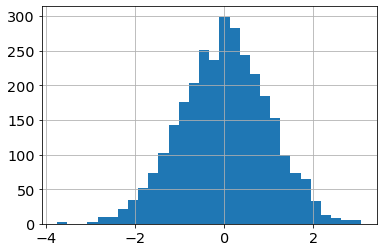

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(samples, bins = 30)
plt.grid(True)

In [ ]:
import numpy as np

print(np.mean(samples))
print(np.median(samples))

0.01192791088837052
0.037654774133183355


In [ ]:
print(scipy.stats.scoreatpercentile(samples, 5)) # 5% percentile
print(scipy.stats.scoreatpercentile(samples, 95)) # 95% percentile

-1.6432917453754534
1.629716837531198


### Example 2: First 4 Moments of $N(0, 1)$
* Skewness: https://en.wikipedia.org/wiki/Skewness
    * Skewness of normal distribution = 0
* Kurtosis: https://en.wikipedia.org/wiki/Kurtosis
    * Kurtosis of normal distribution = 3
    * Excess kurtosis of normal distribution = 0


In [ ]:
np.mean(samples)

0.01192791088837052

In [ ]:
np.var(samples)

0.9711496488724688

In [ ]:
scipy.stats.skew(samples)

-0.06405974707537526

In [ ]:
scipy.stats.kurtosis(samples) # Excess kurtosis = kurtosis - 3

-0.033074245149097514

In [ ]:
for i in range(1, 5):
    print(scipy.stats.moment(samples, i))

0.0
0.9711496488724688
-0.06130761985460641
2.7982015544294216


### Example 3: Distribution of Return Rates of Stock

In [ ]:
!pip install ffn

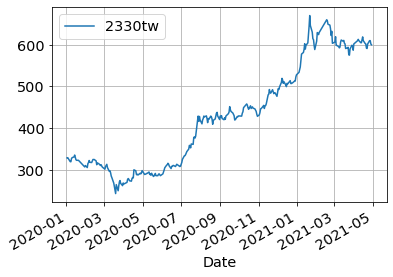

In [ ]:
import ffn

data = ffn.get("2330.tw", start = "2020-01-01")
data.plot(grid = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac75b09090>]],
      dtype=object)

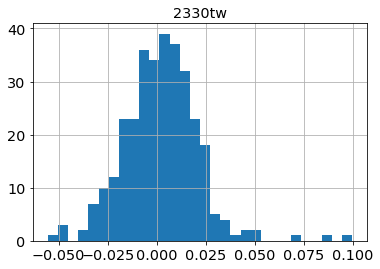

In [ ]:
return_rates = data.pct_change().dropna()
return_rates.hist(bins = 30)

In [ ]:
scipy.stats.kurtosis(return_rates) # The distribution with a higher kurtosis has a heavier tail.

array([3.41316861])

### Example 4: RNG for Common Probability Distributions 
* Standard uniform distribution $\text{Uni}(0, 1)$ [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html#scipy.stats.uniform)
    - numpy.random.uniform
    - scipy.stats.uniform
* **Standard normal distribution** $N(0, 1)$ [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm)
    - numpy.random.randn
    - scipy.stats.norm
* $\chi^2$ distribution [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html#scipy.stats.chi2)
    - scipy.stats.chi2
- Student's t-distribution [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html)
    - scipy.stats.t
* F distribution [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html#scipy.stats.f)
    - scipy.stats.f
* Poisson distriubtion [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson)
    - scipy.stats.poisson

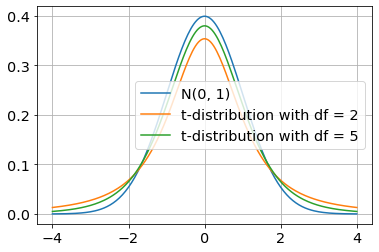

In [ ]:
x = np.linspace(-4, 4, 201)
y1 = scipy.stats.norm.pdf(x)
y2 = scipy.stats.t.pdf(x, df = 2)
y3 = scipy.stats.t.pdf(x, df = 5)

plt.figure()
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.legend(["N(0, 1)", "t-distribution with df = 2", "t-distribution with df = 5"])
plt.grid(True)

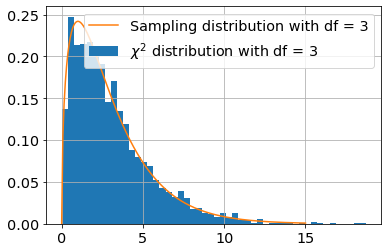

In [ ]:
x = np.linspace(0, 15, 201)
y = scipy.stats.chi2.pdf(x, df = 3)
y1 = scipy.stats.chi2.rvs(size = 2000, df = 3)

plt.figure()
plt.hist(y1, bins = 50, density = True)
plt.plot(x, y)
plt.legend(["Sampling distribution with df = 3", "$\chi^2$ distribution with df = 3"])
plt.grid(True)

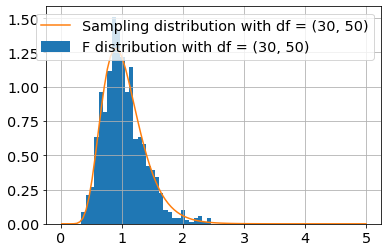

In [ ]:
x = np.linspace(0.01, 5, 101)
y = scipy.stats.f.pdf(x, dfn = 30, dfd = 50)
y1 = scipy.stats.f.rvs(size = 1000, dfn = 30, dfd = 50)

plt.figure()
plt.hist(y1, bins = 30, density = True)
plt.plot(x, y)
plt.legend(["Sampling distribution with df = (30, 50)", "F distribution with df = (30, 50)"])
plt.grid(True)

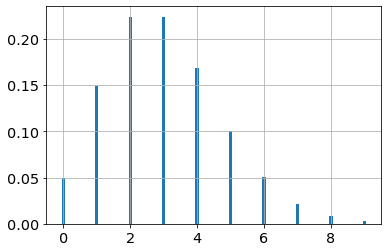

In [ ]:
mu = 3
x = np.arange(scipy.stats.poisson.ppf(0.001, mu),
        scipy.stats.poisson.ppf(0.999, mu))

fig, ax = plt.subplots(1, 1)
ax.bar(x, scipy.stats.poisson.pmf(x, mu), width = 0.1, label = "Poisson pmf")
plt.grid(True)

### Example 5: Hypothesis Testing
- $H_0$: the null hypothesis
- $H_1$ or $H_A$: the alternative hypothesis
- Significance level $\alpha = 0.05$ or less
- [$p$-value](https://en.wikipedia.org/wiki/P-value): the $p$-value is the probability of obtaining test results at least as extreme as the results actually observed, under the assumption that the null hypothesis is correct. 
- Your work is to **reject $H_0$** based on the observed data and accept $H_A$.

#### Normality Test
* Shapiro test [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)
    - H0: the data was drawn from a normal distribution. 
* Jarque-Bera test [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.jarque_bera.html)
    * H0: joint hypothesis of the skewness being zero and the excess kurtosis being zero.
* Kolmogorov-Smirnov test for goodness of fit [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html)
    - H0: the two distributions are identical, that is, F(x) = G(x).


In [ ]:
_, pvalue = scipy.stats.shapiro(return_rates)
pvalue

1.0555327634165224e-07

In [ ]:
_, pvalue = scipy.stats.jarque_bera(return_rates)
pvalue

0.0

In [ ]:
_, pvalue = scipy.stats.kstest(scipy.stats.zscore(return_rates), 'norm')
pvalue

0.0

#### Digression: QQ Plot

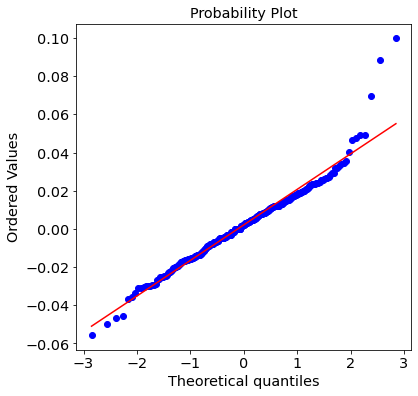

In [ ]:
scipy.stats.probplot(return_rates.values.ravel(), dist = scipy.stats.norm, plot = plt.figure(figsize = (6, 6)).add_subplot(111))
print()

## Package: statsmodels
- https://www.statsmodels.org/stable/index.html

In [ ]:
!pip install statsmodels

In [ ]:
import statsmodels.api as sm
import numpy as np
import scipy
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Simple Linear Regression

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/Okuns_law_quarterly_differences.svg/1280px-Okuns_law_quarterly_differences.svg.png" width = "400">

- Galton (1866): Regression towards Mediocrity in Hereditary Stature.
- Chung-Ming Kuan: https://www.csie.ntu.edu.tw/~d00922011/python/slides/QA-Slide_Lec-1_20200225.pdf
- Let $n$ be the number of samples $(X_i, Y_i)$ where $i = 1, \ldots, n$.
- The linear model states below:
$$Y_i = \beta_0 + \beta_1 X_i + \varepsilon_i,$$ 
where (1) $X_i$ is the explanatory variable (2) $Y_i$ is the explained variable.
- We apply the following assumptions to the linear model:
    1. $X_i$ is nonstochastic.
    2. $\mathbf{E}(\varepsilon_i) = 0.$
    3. Homoscedasticity: $\mathbf{Var}(\varepsilon_i) = \sigma^2$ for $i = 0, 1, \ldots, n.$
    4. Serial independence: $\mathbf{E}(\varepsilon_i\varepsilon_j) = 0$ for all $i \neq j.$
    5. Normality assumption: $\varepsilon_i \sim N(0, \sigma^2).$
    6. Lack of perfect multicollinearity in the predictors.
- So that we can say $$Y_i \sim N(\beta_0 + \beta_1 X_i, \sigma^2).$$
- Now we use $$Y_i = \hat\beta_0 + \hat\beta_1 X_i$$ to estimate $$Y_i = \beta_0 + \beta_1 X_i$$
- You could estimate $\beta_0$ and $\beta_1$ by using

    1. **method of least squares**, 
    2. **method of maximum likelihood estimation (MLE)**,
    3. **method of moments (MoM)**.

- To demonstrate the method of least squares, we first formulate the set of linear equations by **normal form**, that is,

$$X^T y = X^T X \beta,$$

where $X$ is the coefficient matrix of linear equations, $y$ be the response vector, and $\beta$ is the vector of unknowns.

- Then we can have $$\beta = (X^TX)X^T y.$$
    - See https://www.youtube.com/watch?v=Zu-UlcfPPUk.

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/OLS_geometric_interpretation.svg/1280px-OLS_geometric_interpretation.svg.png" width = "400">

- References
    - https://en.wikipedia.org/wiki/Linear_regression

#### Example 1: Polynomials
- Now we consider $y = 1 + 0.1x + 10x^2.$
- To demonstrate how the linear regresson model works, we add some white noises to the equation.

In [ ]:
# Sample size
nsample = 100

# Data generation
x = np.linspace(0, 1, nsample)
beta = np.array([1, 0.1, 10]) 

X = np.column_stack((x, x ** 2))
X = sm.add_constant(X) # Add an intercept.
y_true = np.dot(X, beta)

In [ ]:
e = np.random.normal(size = nsample)
y = y_true + e

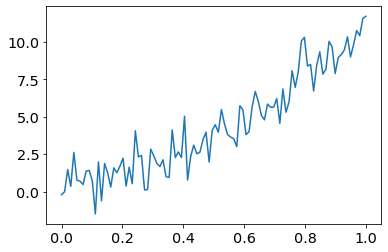

In [ ]:
plt.figure()
plt.plot(x, y)

In [ ]:
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     473.8
Date:                Fri, 30 Apr 2021   Prob (F-statistic):           8.67e-51
Time:                        11:07:11   Log-Likelihood:                -142.88
No. Observations:                 100   AIC:                             291.8
Df Residuals:                      97   BIC:                             299.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6266      0.302      2.078      0.0

#### Summary of Statistics in First Row
- **Coefficients of determination** ($R^2$ and adjusted $R^2$ statistic): one of goodness of fitness (GoF). [link](https://en.wikipedia.org/wiki/Coefficient_of_determination)
- **F-statistic**
    - $H_0$: all the regression coefficients are equal to 0 (except the coefficient on the intercept).
- **Log-Likelihood** [link](https://en.wikipedia.org/wiki/Likelihood_function)
    - Given a parameterized family of probability density functions, $x \longmapsto f(x|\theta)$ where $\theta$ is the parameter, the likelihood function is $\theta \longmapsto L(\theta|x)$ where $x$ is the observed outcome of an experiment.
    - Log-likelihood function is a logarithmic transformation of the likelihood function.
    - For practical purposes it is more convenient to work with the log-likelihood function in maximum likelihood estimation (MLE).
- **Akaike Information Criterion (AIC)** [link](https://en.wikipedia.org/wiki/Akaike_information_criterion)
    - Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models.
    - Thus, AIC provides a means for **model selection**.
    - In estimating the amount of information lost by a model, AIC deals with **the trade-off between the goodness of fit of the model and the simplicity of the model**.
    - In other words, **AIC deals with both the risk of overfitting and the risk of underfitting.**
- **Bayesian Information Criterion (BIC)** [link](https://en.wikipedia.org/wiki/Bayesian_information_criterion)
    - Note that the model with the lowest BIC is preferred.
    - The penalty term is larger in BIC than in AIC.

#### Summary of Statistics in Middle Row
- **t-test** [link]()
    - $H_0$: the coefficient $\beta_i$ is equal to 0 for some $i$.

#### Summary of Statistics in Bottom Row
- **D'Agostino-Pearson Omnibus test** [link](https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test)
    - The D'Agostino-Pearson test is based on the fact that when the data is  normally distributed the test statistic $z^2_k + z^2_s$ has a $\chi^2$ distribution with 2 degrees of freedom, that is, $z^2_k + z^2_s \sim \chi^2(2).$
    - This test should generally not be used for data sets with less than 20 elements.
- **Jarque-Bera test** [link](https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test)
    - $H_0$: the data is normally distributed.
    - $H_1$: the data follow some other distribution. 
- **Durbin-Watson test** [link](https://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic)
    - The null hypothesis of the test is that there is no serial correlation
    in the residuals.
- **Condition number** [link](https://en.wikipedia.org/wiki/Condition_number)
    - If the condition number is large, this might indicate that there are strong multicollinearity or other numerical problems.

In [ ]:
print('Parameters: ', result.params)
print('R2: ', result.rsquared)

Parameters:  [0.62658912 1.44056773 9.12067185]
R2:  0.907147243200572


In [ ]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

prstd, iv_l, iv_u = wls_prediction_std(result, alpha = 0.05)

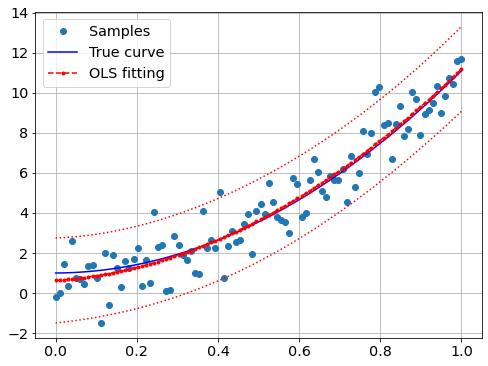

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(x, y, 'o', label = "Samples")
ax.plot(x, y_true, 'b-', label = "True curve")
ax.plot(x, result.fittedvalues, 'r--.', label = "OLS fitting")
ax.plot(x, iv_l, 'r:')
ax.plot(x, iv_u, 'r:')
ax.legend(loc = 'best')
ax.grid(True)

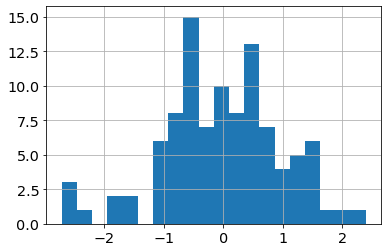

In [ ]:
residues = result.fittedvalues - y

plt.figure()
plt.hist(residues, 20)
plt.grid(True)

In [ ]:
import scipy

print(scipy.stats.kstest(residues, 'norm'))

KstestResult(statistic=0.04981984481268727, pvalue=0.9650857843820665)


#### Example 2: OLS Non-linear Curve but Linear in Parameters
- Consider the function $f(x) = 0.5 x + 0.5 \sin(x) - 0.02 (x - 5) ^ 2 + 5.$

In [ ]:
nsample = 50
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x - 5) ** 2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.0]

y_true = np.dot(X, beta)
y = y_true + np.random.normal(size = nsample)

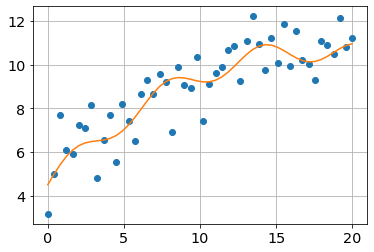

In [ ]:
plt.figure()
plt.plot(x, y, 'o')
plt.plot(x, y_true)
plt.grid(True)

In [ ]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     57.54
Date:                Fri, 30 Apr 2021   Prob (F-statistic):           1.32e-15
Time:                        11:07:11   Log-Likelihood:                -68.207
No. Observations:                  50   AIC:                             144.4
Df Residuals:                      46   BIC:                             152.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4697      0.052      9.053      0.0

In [ ]:
print('Parameters: ', res.params)

Parameters:  [ 0.46970448  0.52497916 -0.01663145  5.25820224]


In [ ]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

prstd, iv_l, iv_u = wls_prediction_std(res)

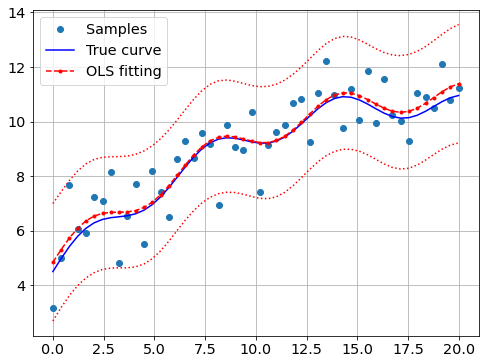

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(x, y, 'o', label = "Samples")
ax.plot(x, y_true, 'b-', label = "True curve")
ax.plot(x, res.fittedvalues, 'r--.', label = "OLS fitting")
ax.plot(x, iv_u, 'r:')
ax.plot(x, iv_l, 'r:')
ax.legend(loc = 'best')
ax.grid(True)